In [1]:
import scipy
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
# Data for the Delinquency Rate on Loans to Finance Agricultural Production
data = pd.read_csv('data/DRFAPGACBS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        133 non-null    object 
 1   DRFAPGACBS  133 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


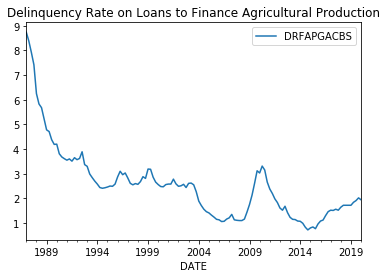

In [3]:
data.index = pd.to_datetime(data['DATE'])
data.plot()
plt.title('Delinquency Rate on Loans to Finance Agricultural Production')
plt.show()

In [4]:
# Make Data Stationary
data['diff1'] = data['DRFAPGACBS'] - data['DRFAPGACBS'].shift()

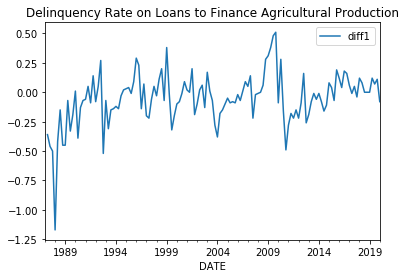

In [5]:
data.plot(y='diff1')
plt.title('Delinquency Rate on Loans to Finance Agricultural Production')
plt.show()

Text(0.5, 1.0, 'PACF Delinquency Rate on Loans to Finance Agricultural Production')

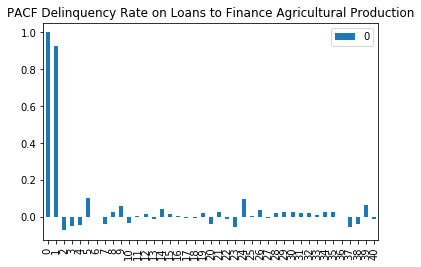

In [6]:
# Investigate the PACF
x_acf = pd.DataFrame(pacf(data.DRFAPGACBS))
x_acf.plot(kind='bar')
plt.title('PACF Delinquency Rate on Loans to Finance Agricultural Production')

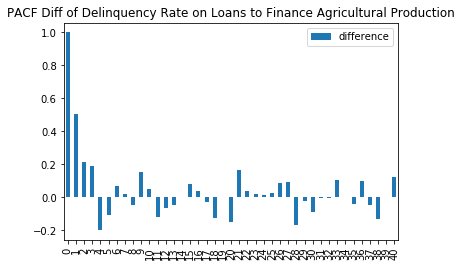

In [7]:
x_acf = pd.DataFrame(pacf(data.diff1[1:]))
x_acf.plot(kind='bar')
plt.title('PACF Diff of Delinquency Rate on Loans to Finance Agricultural Production')
plt.legend(['difference'])

In [8]:
model = ARIMA(data.diff1[1:], order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  diff1   No. Observations:                  132
Model:                     ARMA(1, 0)   Log Likelihood                  35.505
Method:                       css-mle   S.D. of innovations              0.185
Date:                Mon, 03 Aug 2020   AIC                            -65.010
Time:                        08:32:56   BIC                            -56.361
Sample:                    04-01-1987   HQIC                           -61.495
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0541      0.032     -1.674      0.094      -0.117       0.009
ar.L1.diff1     0.5063      0.075      6.733      0.000       0.359       0.654
                                    Roots       

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [9]:
model = ARIMA(data.diff1[1:], order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals')
print(model_fit.resid.describe())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  diff1   No. Observations:                  132
Model:                     ARMA(1, 1)   Log Likelihood                  39.704
Method:                       css-mle   S.D. of innovations              0.179
Date:                Mon, 03 Aug 2020   AIC                            -71.408
Time:                        08:32:56   BIC                            -59.877
Sample:                    04-01-1987   HQIC                           -66.722
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0608      0.048     -1.258      0.209      -0.156       0.034
ar.L1.diff1     0.8209      0.083      9.867      0.000       0.658       0.984
ma.L1.diff1    -0.4318      0.120     -3.612    

In [10]:
model = ARIMA(data.diff1[1:], order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  diff1   No. Observations:                  132
Model:                     ARMA(0, 1)   Log Likelihood                  29.556
Method:                       css-mle   S.D. of innovations              0.193
Date:                Mon, 03 Aug 2020   AIC                            -53.113
Time:                        08:32:56   BIC                            -44.464
Sample:                    04-01-1987   HQIC                           -49.598
                         - 01-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0522      0.024     -2.218      0.027      -0.098      -0.006
ma.L1.diff1     0.4026      0.074      5.467      0.000       0.258       0.547
                                    Roots       

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [11]:
model = ARIMA(data.diff1[1:], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals')
print(model_fit.resid.describe())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.diff1   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  36.408
Method:                       css-mle   S.D. of innovations              0.183
Date:                Mon, 03 Aug 2020   AIC                            -64.816
Time:                        08:32:56   BIC                            -53.315
Sample:                    07-01-1987   HQIC                           -60.143
                         - 01-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.004      0.982      0.326      -0.004       0.011
ar.L1.D.diff1     0.2745      0.206      1.332      0.183      -0.129       0.678
ma.L1.D.diff1    -0.8462      0.158     

In [12]:
model = ARIMA(data.diff1[1:], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals')
print(model_fit.resid.describe())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.diff1   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  37.636
Method:                       css-mle   S.D. of innovations              0.180
Date:                Mon, 03 Aug 2020   AIC                            -63.271
Time:                        08:32:56   BIC                            -46.020
Sample:                    07-01-1987   HQIC                           -56.261
                         - 01-01-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0037      0.004      0.904      0.366      -0.004       0.012
ar.L1.D.diff1    -0.7347      0.232     -3.160      0.002      -1.190      -0.279
ar.L2.D.diff1     0.1975      0.232     

The best scoring ARIMA model out of these had an order of (1,0,1) and was calculated on the stationary value rather than the original loan delinquency rate. It had the lowest AIC score out of all 5 models which suggests it is the more reliable model.